<a href="https://colab.research.google.com/github/AndreAmorim05/data-science/blob/main/analise_dos_dados_do_airbnb_para_o_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - Número de id gerado para identificação do imóvel;
* name - Nome da propriedade anunciada;
* host_id - Número de id do proprietário (anfitrião) do imóvel;
* neighbourhood_group - Esta coluna não contém nenhum valor válido;
* neighbourhood - Nome do bairro;
* latitude - Coordenada da latitude da propriedade;
* longitude - Coordenada da longitude da propriedade;
* room_type - Informa o tipo de quarto que é oferecido;
* price - Preço para alugar o imóvel;
* minimun_nights - Quantidade mínima de noites para reservar;
* number_of_reviews - Número de reviews que a propriedade possui;
* last_review - Data do último review;
* reviews_per_month - Quantidade de reviews por mês;
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião;
* availability_365 - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,329,4,238,2019-08-24,2.13,1,312
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,233,2019-08-03,2.06,3,114
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,270,2,264,2019-08-10,2.36,1,137
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,374,2,162,2019-09-09,2.25,1,73
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,129,3,309,2019-09-15,2.83,1,118


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'O número de variáveis do DataSet é {df.shape[0]}')
print(f'O número de entradas do DataSet é {df.shape[1]}\n')
# verificar as 5 primeiras entradas do dataset
# df.info()
display(df.dtypes)

O número de variáveis do DataSet é 34329
O número de entradas do DataSet é 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum())/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.467360
last_review                       0.467360
name                              0.001864
host_name                         0.000408
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma, onde podemos identificar a margem de distribuição dos valores de cada variável numérica.

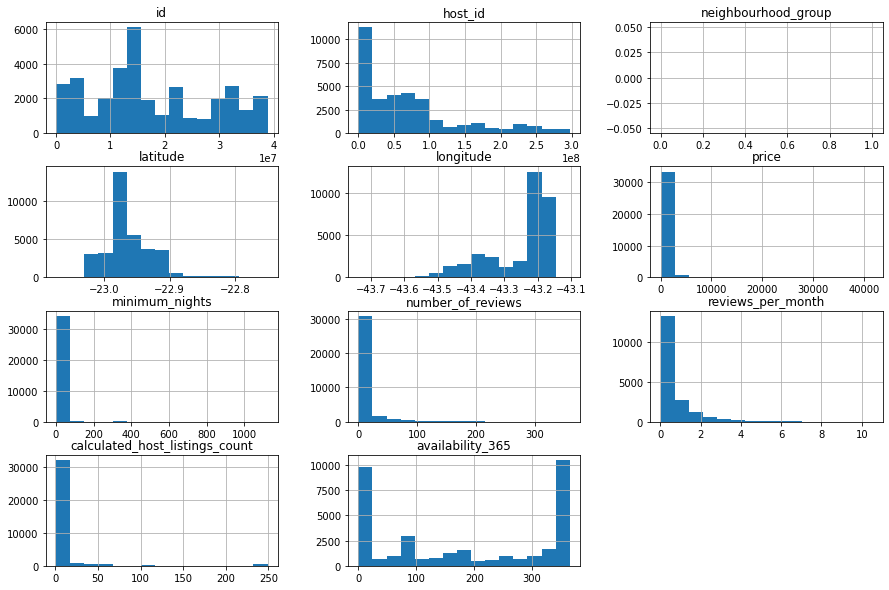

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
df['price'].mean()

647.9506830959248

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela, tanto podendo ser uma correlação positiva, em que a relação é direta e na mesma direção, onde uma variável está ligada a outra e quanto mais perto de 1 mais forte essa relação, quando negativa, temos que as variáveis andam em direções opostas e quanto mais próximo de -1 mais forte essa relação. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.032502,-0.081352,-0.089905,-0.001153,-0.010712
minimum_nights,0.032502,1.000000,-0.025687,-0.032581,-0.008706,0.010720
number_of_reviews,-0.081352,-0.025687,1.000000,0.636211,-0.033950,0.013813
reviews_per_month,-0.089905,-0.032581,0.636211,1.000000,-0.022277,-0.043454
calculated_host_listings_count,-0.001153,-0.008706,-0.033950,-0.022277,1.000000,0.077697
availability_365,-0.010712,0.010720,0.013813,-0.043454,0.077697,1.000000


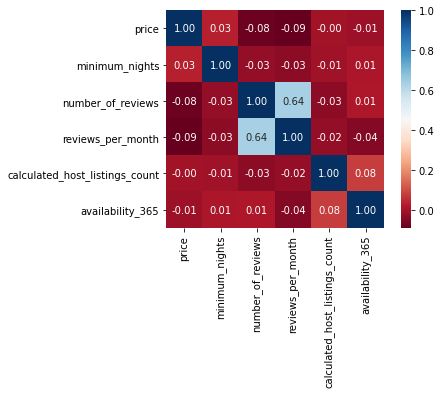

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(data=corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    24145
Private room        9053
Shared room          762
Hotel room           369
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0])*100

Entire home/apt    70.334120
Private room       26.371290
Shared room         2.219698
Hotel room          1.074893
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Ramos                3472.333333
Joá                  2768.534653
Engenheiro Leal      2730.500000
Campinho             2628.800000
Vila Militar         2358.333333
Bangu                2308.086957
Padre Miguel         1987.272727
São Conrado          1787.239216
Itanhangá            1709.358824
Alto da Boa Vista    1447.625000
Name: price, dtype: float64

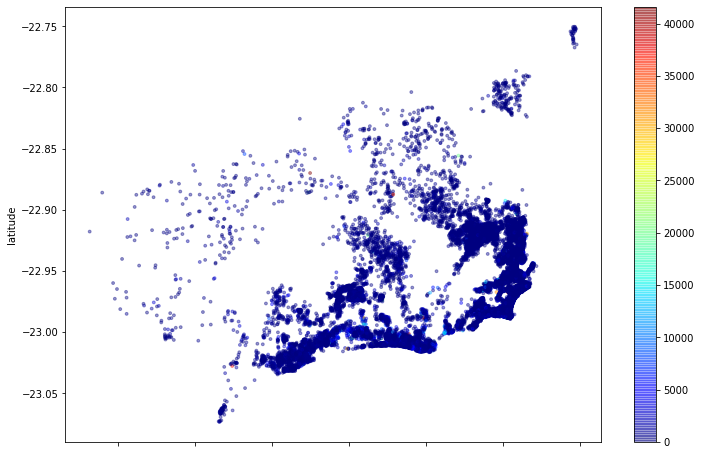

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.groupby(['minimum_nights'])['price'].mean().sort_values(ascending=True)[:10]

minimum_nights
222     46.0
182     54.0
33      58.0
109     75.0
183    100.0
930    121.0
190    129.0
135    137.0
35     150.0
899    179.0
Name: price, dtype: float64

## Conclusões


Através da análise realizada foi possível extrair diversos *`insights`* sobre o que o *dataset* tem a oferecer, como média de preços de aluguel, tipos de imóveis mais alugados (onde há maior demanda), localidades mais caras, distribuição regional e maior densidade de vagas, entre outros. Informações essas que nos proporcionam uma condição de melhor de escolha para realizar um aluguél ou nos dando margens para analisar se são favoraveis as condições de se colocar um imóvel para alugar.